In [1]:
import pandas as pd 
import seaborn as sns 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt 
from gensim import corpora, models
from pyLDAvis.gensim_models import prepare
import pickle
import pyLDAvis

C:\Anaconda\envs\uni\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


# part A

In [2]:
data = pd.read_json('https://raw.githubusercontent.com/selva86/datasets/master/newsgroups.json')

C:\Anaconda\envs\uni\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
data_stem = pickle.load(open('stemmed.pkl', "rb"))

C:\Anaconda\envs\uni\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
data['preprocessed'] = data_stem
data

C:\Anaconda\envs\uni\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,content,target,target_names,preprocessed
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7,rec.autos,car wonder enlighten car saw dai door sport ca...
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,comp.sys.mac.hardware,clock poll final final clock report acceler cl...
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,comp.sys.mac.hardware,question folk mac plu final gave ghost weekend...
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1,comp.graphics,weitek robert kyanko rob rjck uucp wrote abrax...
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,sci.space,shuttl launch question articl cowcb world std ...
...,...,...,...,...
11309,From: jim.zisfein@factory.com (Jim Zisfein) \n...,13,sci.med,migrain scan nyeda cnsvax uwec edu david nye n...
11310,From: ebodin@pearl.tufts.edu\nSubject: Screen ...,4,comp.sys.mac.hardware,screen death mac plu old mac mac plu problem s...
11311,From: westes@netcom.com (Will Estes)\nSubject:...,3,comp.sys.ibm.pc.hardware,mount cpu cooler vertic case instal cpu clone ...
11312,From: steve@hcrlgw (Steven Collins)\nSubject: ...,1,comp.graphics,sphere point articl qkgbuinnsn shellei washing...


. Load the Newsgroup data from
https://raw.githubusercontent.com/selva86/datasets/master/newsgroups.json. Add a
column ‘preprocessed’ to it consisting of the stemmed data from Exercise 2. Sort the
data frame to contain only the following topics: 'soc.religion.christian',
'rec.sport.hockey', 'talk.politics.mideast', 'rec.motorcycles'. Apply sklearn’s tf-idf
transformer to the whole dataset with max_df=0.7, min_df=0.1. Store the frequency
matrix in data_tfidf. Store the feature names in a words list

In [5]:
topics = ['soc.religion.christian','rec.sport.hockey', 'talk.politics.mideast', 'rec.motorcycles']
data_filtered = data[data.target_names.isin(topics)]
data_filtered.target_names.value_counts()

C:\Anaconda\envs\uni\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


rec.sport.hockey          600
soc.religion.christian    599
rec.motorcycles           598
talk.politics.mideast     564
Name: target_names, dtype: int64

In [6]:
data_filtered.shape

C:\Anaconda\envs\uni\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(2361, 4)

In [7]:
vectorizer = TfidfVectorizer(max_df=0.7, min_df=0.1, smooth_idf=False) # TF_IDF2
data_tfidf = vectorizer.fit_transform(data_filtered.preprocessed)
data_tfidf.toarray().shape

C:\Anaconda\envs\uni\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(2361, 90)

In [8]:
words = vectorizer.get_feature_names()
print(words)
print(len(words))

['apr', 'articl', 'ask', 'awai', 'believ', 'best', 'better', 'bike', 'call', 'case', 'christian', 'claim', 'com', 'come', 'cours', 'dai', 'differ', 'dod', 'edu', 'end', 'exist', 'fact', 'far', 'follow', 'game', 'gener', 'get', 'go', 'god', 'good', 'got', 'great', 'happen', 'help', 'hockei', 'israel', 'kill', 'know', 'let', 'life', 'like', 'littl', 'live', 'long', 'look', 'lot', 'make', 'mean', 'need', 'new', 'opinion', 'peopl', 'person', 'place', 'plai', 'point', 'possibl', 'post', 'probabl', 'problem', 'question', 'read', 'reason', 'right', 'rutger', 'sai', 'said', 'start', 'state', 'sure', 'talk', 'team', 'tell', 'thank', 'thing', 'think', 'thought', 'time', 'todai', 'true', 'try', 'univers', 'us', 'wai', 'want', 'word', 'work', 'world', 'write', 'year']
90
C:\Anaconda\envs\uni\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exc

# part B

In [9]:
kmeans = KMeans(n_clusters = 4, max_iter=1000)
kmeans.fit(data_tfidf)


C:\Anaconda\envs\uni\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


KMeans(max_iter=1000, n_clusters=4)

In [41]:
kmeans.cluster_centers_

C:\Anaconda\envs\uni\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[0.03725854, 0.04085734, 0.03752146, 0.01393395, 0.12265573,
        0.01490302, 0.01276824, 0.00317402, 0.02423047, 0.01860969,
        0.2511332 , 0.04556083, 0.03227961, 0.05782883, 0.02288217,
        0.03695093, 0.03755983, 0.00112212, 0.08684425, 0.02379749,
        0.05549413, 0.03768608, 0.02442148, 0.03804991, 0.00225936,
        0.02167116, 0.00769755, 0.02100608, 0.33875591, 0.0411289 ,
        0.01534828, 0.02002459, 0.01885105, 0.02279878, 0.        ,
        0.00357906, 0.01491795, 0.07157312, 0.01954468, 0.05727042,
        0.05753288, 0.0155343 , 0.05268621, 0.01886878, 0.02192368,
        0.02489113, 0.02226027, 0.06024108, 0.03387519, 0.03248164,
        0.02924333, 0.09618387, 0.04438356, 0.02502259, 0.00462949,
        0.03849462, 0.02885064, 0.03220016, 0.0173366 , 0.03482642,
        0.06807507, 0.04169052, 0.05003898, 0.03264248, 0.06373539,
        0.04585389, 0.03156679, 0.01538227, 0.01913689, 0.0225363 ,
        0.03573185, 0.        , 0.02752435, 0.02

In [10]:
kmeans.cluster_centers_.argsort()

C:\Anaconda\envs\uni\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[34, 71, 17, 24,  7, 35, 54, 26,  6,  3,  5, 36, 30, 67, 41, 78,
        58,  9, 32, 43, 68, 76, 38, 31, 27, 25, 44, 46, 69, 73, 33, 14,
        19,  8, 22, 89, 45, 53, 72, 56, 50, 80, 66, 57, 12, 49, 63, 81,
        87, 48, 59, 70, 82, 15,  0,  2, 16, 21, 84, 23, 55,  1, 29, 61,
        86, 52, 11, 65, 83, 77, 62, 79, 42, 74, 88, 20, 39, 40, 13, 47,
        85, 64, 60, 37, 75, 18, 51,  4, 10, 28],
       [10, 34, 24, 71, 20, 64, 11, 35, 28,  4,  8, 54, 78, 21, 36, 70,
        79, 53, 39, 85, 23, 32, 61, 56, 38, 81, 52, 72,  2,  5, 55, 14,
        25, 13,  3, 62, 51, 16,  6, 76, 22, 87, 66, 58, 65,  9, 69, 68,
        15, 33, 31, 67, 50, 45, 59, 89, 43, 46, 19, 26, 80, 47, 42, 41,
        73, 57, 83, 60, 82, 63, 84, 27, 48, 86, 75, 30, 77, 74, 37, 44,
        49, 29,  0, 40, 18, 88,  1, 17,  7, 12],
       [64, 35,  7, 17, 28, 39, 20, 10, 25, 36, 11, 78,  2, 42,  9, 21,
        33, 82, 85, 53, 61, 70, 86, 65, 52, 79, 56, 60, 43, 72, 14,  8,
         4, 68, 62, 16, 50, 22, 80, 59

Coordinates of cluster centers. If the algorithm stops before fully converging (see tol and max_iter), these will not be consistent with labels_.

In [11]:
common_words = kmeans.cluster_centers_.argsort()[:,-1:-11:-1]
common_words

C:\Anaconda\envs\uni\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[28, 10,  4, 51, 18, 75, 37, 60, 64, 85],
       [12,  7, 17,  1, 88, 18, 40,  0, 29, 49],
       [24, 71, 54, 34, 18, 89, 88, 49, 75, 77],
       [18, 35, 88, 51,  1, 49, 37, 77, 63, 40]], dtype=int64)

In [12]:
for num, centroid in enumerate(common_words):
 print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : god, christian, believ, peopl, edu, think, know, question, rutger, word
1 : com, bike, dod, articl, write, edu, like, apr, good, new
2 : game, team, plai, hockei, edu, year, write, new, think, time
3 : edu, israel, write, peopl, articl, new, know, time, right, like
C:\Anaconda\envs\uni\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
kmeans.labels_.shape

C:\Anaconda\envs\uni\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(2361,)

In [14]:
data_filtered['label'] = kmeans.labels_
data_filtered[data_filtered['label'] == 0].head()

C:\Anaconda\envs\uni\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Anaconda\envs\uni\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,content,target,target_names,preprocessed,label
28,From: jonh@david.wheaton.edu (Jonathan Hayward...,15,soc.religion.christian,pantheism environment articl apr atho rutger e...,0
51,From: dlecoint@garnet.acns.fsu.edu (Darius_Lec...,15,soc.religion.christian,sabbath admiss follow thread talk religion soc...,0
94,From: speedy@engr.latech.edu (Speedy Mercer)\n...,8,rec.motorcycles,motorcycl detail tip articl apr hemlock crai c...,0
120,From: shd2001@andy.bgsu.edu (Sherlette Dixon)\...,15,soc.religion.christian,christian atheism updat like thank sent opinio...,0
123,From: JEK@cu.nih.gov\nSubject: John 3:16 parap...,15,soc.religion.christian,john paraphras end recent mon apr post alastai...,0


In [15]:
data_filtered[data_filtered['label'] == 2].head()

C:\Anaconda\envs\uni\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,content,target,target_names,preprocessed,label
21,From: leunggm@odin.control.utoronto.ca (Gary L...,10,rec.sport.hockey,nhl team captain articl apr samba oit unc edu ...,2
57,From: d_jaracz@oz.plymouth.edu (David R. Jarac...,10,rec.sport.hockey,octopu detroit articl dlmqc cunyvm bitnet haro...,2
172,From: kozloce@wkuvx1.bitnet\nSubject: Re: Good...,10,rec.sport.hockey,good hockei bad hockei articl rsjbww cellar or...,2
174,Subject: Re: NHLPA poll (partial stats/results...,10,rec.sport.hockey,nhlpa poll partial stat result articl ofnmao i...,2
208,From: seth@cbnewsh.cb.att.com (peter.r.clark.....,10,rec.sport.hockey,flyer year biggest worst opinion nhl award art...,2


C:\Anaconda\envs\uni\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


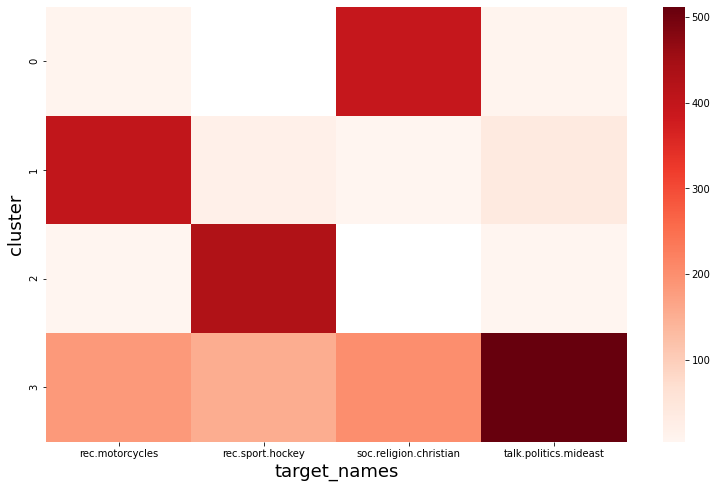

In [16]:
from seaborn import heatmap
clusters = data_filtered.groupby(['label', 'target_names']).size()
fig, ax1 = plt.subplots(figsize = (13,8))
heatmap(clusters.unstack(level = 'target_names'), ax = ax1, cmap = 'Reds')
ax1.set_xlabel('target_names').set_size(18)
ax1.set_ylabel('cluster').set_size(18)


Add a column pred to the data frame setting its values to the target you would expect
in 4. i.e. if you think that cluster 0 should correspond to topic rec.motorcycles, then all
datapoints with df['cluster']==0 would get pred set to 8.
8. Print the classification report on target and pred. Are the results good?

In [17]:
data_filtered['pred'] = 0

C:\Anaconda\envs\uni\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Anaconda\envs\uni\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
for index, row in data_filtered.iterrows():
    if row.label == 0:
        data_filtered.loc[index,'pred'] = 10
    if row.label == 1:
        data_filtered.loc[index,'pred'] = 17
    if row.label == 2:
        data_filtered.loc[index,'pred'] = 15
    if row.label == 3:
        data_filtered.loc[index,'pred'] = 8

C:\Anaconda\envs\uni\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Anaconda\envs\uni\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [19]:
data_filtered

C:\Anaconda\envs\uni\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,content,target,target_names,preprocessed,label,pred
10,From: irwin@cmptrc.lonestar.org (Irwin Arnstei...,8,rec.motorcycles,recommend duc worth ducati gt line ducati gt m...,1,17
21,From: leunggm@odin.control.utoronto.ca (Gary L...,10,rec.sport.hockey,nhl team captain articl apr samba oit unc edu ...,2,15
28,From: jonh@david.wheaton.edu (Jonathan Hayward...,15,soc.religion.christian,pantheism environment articl apr atho rutger e...,0,10
33,From: ayr1@cunixa.cc.columbia.edu (Amir Y Rose...,17,talk.politics.mideast,isra expans lust articl spam math adelaid edu ...,3,8
35,From: dchhabra@stpl.ists.ca (Deepak Chhabra)\n...,10,rec.sport.hockey,goali mask articl netnew upenn edu kkeller mai...,3,8
...,...,...,...,...,...,...
11298,From: cbetz@radioman.cray.com (Charles Betz {...,10,rec.sport.hockey,nhl team milwauke read report possibl nhl move...,2,15
11299,From: 2120788@hydra.maths.unsw.EDU.AU ()\nSubj...,17,talk.politics.mideast,turkei cypru bosnia serbia greec armenia azeri...,3,8
11300,From: aa888@freenet.carleton.ca (Mark Baker)\n...,15,soc.religion.christian,arrog christian previou articl phsd vaxc monas...,0,10
11305,From: shaig@composer.think.com (Shai Guday)\nS...,17,talk.politics.mideast,hezbollah apr yuma acn colost edu repli long l...,3,8


In [20]:
print(classification_report(data_filtered.pred, data_filtered.target))

              precision    recall  f1-score   support

           8       0.31      0.17      0.22      1049
          10       0.00      0.00      0.00       410
          15       0.00      0.00      0.00       438
          17       0.07      0.08      0.08       464

    accuracy                           0.09      2361
   macro avg       0.09      0.06      0.07      2361
weighted avg       0.15      0.09      0.11      2361

C:\Anaconda\envs\uni\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Part C

In [21]:
from gensim.corpora import Dictionary

C:\Anaconda\envs\uni\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Create a gensim dictionary from the df[‘preprocessed’] (Hint: Remember to split the
texts, see Exercise 2.). Call it dictionary. Remove rare and common words from it
(no_below=118, no_above=0.95). Derive the absolute frequency matrix using
gensim’s doc2bow and store them in the list corpus.


In [22]:
data_filtered['split'] = data_filtered.preprocessed.str.split()
data_filtered.head()

C:\Anaconda\envs\uni\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Anaconda\envs\uni\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,content,target,target_names,preprocessed,label,pred,split
10,From: irwin@cmptrc.lonestar.org (Irwin Arnstei...,8,rec.motorcycles,recommend duc worth ducati gt line ducati gt m...,1,17,"[recommend, duc, worth, ducati, gt, line, duca..."
21,From: leunggm@odin.control.utoronto.ca (Gary L...,10,rec.sport.hockey,nhl team captain articl apr samba oit unc edu ...,2,15,"[nhl, team, captain, articl, apr, samba, oit, ..."
28,From: jonh@david.wheaton.edu (Jonathan Hayward...,15,soc.religion.christian,pantheism environment articl apr atho rutger e...,0,10,"[pantheism, environment, articl, apr, atho, ru..."
33,From: ayr1@cunixa.cc.columbia.edu (Amir Y Rose...,17,talk.politics.mideast,isra expans lust articl spam math adelaid edu ...,3,8,"[isra, expans, lust, articl, spam, math, adela..."
35,From: dchhabra@stpl.ists.ca (Deepak Chhabra)\n...,10,rec.sport.hockey,goali mask articl netnew upenn edu kkeller mai...,3,8,"[goali, mask, articl, netnew, upenn, edu, kkel..."


In [23]:
dictionary = Dictionary(data_filtered.split)
dictionary.filter_extremes(no_below=118, no_above=0.95)

C:\Anaconda\envs\uni\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
print(dictionary.token2id) # words with their tokens

{'bike': 0, 'bit': 1, 'dod': 2, 'hard': 3, 'like': 4, 'line': 5, 'opinion': 6, 'org': 7, 'run': 8, 'thank': 9, 'think': 10, 'want': 11, 'apr': 12, 'articl': 13, 'believ': 14, 'claim': 15, 'cours': 16, 'current': 17, 'edu': 18, 'got': 19, 'later': 20, 'mark': 21, 'mike': 22, 'nhl': 23, 'plai': 24, 'real': 25, 'season': 26, 'speak': 27, 'team': 28, 'time': 29, 'wasn': 30, 'write': 31, 'accept': 32, 'atho': 33, 'attack': 34, 'base': 35, 'call': 36, 'care': 37, 'complet': 38, 'cover': 39, 'gener': 40, 'go': 41, 'god': 42, 'group': 43, 'import': 44, 'leav': 45, 'love': 46, 'mayb': 47, 'mean': 48, 'men': 49, 'mind': 50, 'new': 51, 'paul': 52, 'peopl': 53, 'point': 54, 'possibl': 55, 'post': 56, 'read': 57, 'respons': 58, 'rutger': 59, 'save': 60, 'serv': 61, 'show': 62, 'thing': 63, 'truth': 64, 'turn': 65, 'us': 66, 'ye': 67, 'act': 68, 'actual': 69, 'arab': 70, 'begin': 71, 'dai': 72, 'drive': 73, 'end': 74, 'entir': 75, 'fight': 76, 'forc': 77, 'happen': 78, 'isn': 79, 'isra': 80, 'israel

In [43]:
corpus = [dictionary.doc2bow(doc) for doc in data_filtered['split']]
print(corpus)

73, 2), (275, 2), (281, 1), (284, 1), (304, 1)], [(0, 9), (2, 1), (48, 4), (73, 1), (126, 1), (130, 1), (148, 1), (154, 1), (166, 1), (183, 1), (266, 1), (281, 1), (292, 1), (308, 1)], [(15, 1), (18, 1), (29, 4), (31, 1), (34, 1), (99, 1), (119, 1), (124, 1), (157, 1), (165, 1), (177, 3), (192, 1), (242, 1), (287, 1), (303, 1), (307, 1), (310, 2)], [(4, 2), (6, 1), (15, 2), (17, 1), (25, 1), (42, 1), (43, 1), (53, 1), (54, 3), (55, 1), (63, 1), (66, 1), (87, 1), (88, 1), (90, 1), (91, 1), (98, 3), (99, 1), (103, 1), (104, 1), (114, 2), (118, 2), (119, 2), (124, 1), (131, 1), (138, 1), (141, 1), (142, 1), (144, 1), (152, 1), (156, 1), (159, 2), (165, 1), (167, 1), (168, 1), (170, 1), (175, 2), (178, 1), (189, 1), (191, 1), (194, 1), (197, 1), (210, 1), (213, 1), (215, 3), (216, 2), (227, 1), (240, 1), (253, 1), (255, 1), (256, 3), (268, 1), (280, 1), (289, 2), (296, 1), (304, 2), (308, 1), (329, 2)], [(3, 1), (4, 1), (5, 1), (10, 2), (12, 1), (13, 2), (18, 2), (23, 1), (24, 2), (26, 3),

In natural language processing, the Latent Dirichlet Allocation (LDA) is a generative statistical model that allows sets of observations to be explained by unobserved groups that explain why some parts of the data are similar. For example, if observations are words collected into documents, it posits that each document is a mixture of a small number of topics and that each word's presence is attributable to one of the document's topics. LDA is an example of a topic model and belongs to the machine learning toolbox and in wider sense to the artificial intelligence toolbox. 

train the model on corpus, Latent Dirichlet allocation

chunksize (int, optional) – Number of documents to be used in each training chunk.

id2word ({dict of (int, str), gensim.corpora.dictionary.Dictionary}) – Mapping from word IDs to words. It is used to determine the vocabulary size, as well as for debugging and topic printing.

num_topics (int, optional) – The number of requested latent topics to be extracted from the training corpus.

iterations (int, optional) – Maximum number of iterations through the corpus when inferring the topic distribution of a corpus.

passes (int, optional) – Number of passes through the corpus during training.


In [44]:
#train the model on corpus, Latent Dirichlet allocation
# chunksize (int, optional) – Number of documents to be used in each training chunk.
# id2word ({dict of (int, str), gensim.corpora.dictionary.Dictionary}) – Mapping from word IDs to words. It is used to determine the vocabulary size, as well as for debugging and topic printing.
#num_topics (int, optional) – The number of requested latent topics to be extracted from the training corpus.
#iterations (int, optional) – Maximum number of iterations through the corpus when inferring the topic distribution of a corpus.
#passes (int, optional) – Number of passes through the corpus during training.
lda = models.LdaModel(corpus, num_topics=4, id2word=dictionary, chunksize=10, iterations=100, passes=10, random_state=42)

C:\Anaconda\envs\uni\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [45]:
 lda.show_topics()

C:\Anaconda\envs\uni\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.044*"edu" + 0.040*"write" + 0.035*"articl" + 0.028*"com" + 0.023*"like" + 0.022*"israel" + 0.022*"apr" + 0.017*"time" + 0.016*"right" + 0.016*"isra"'),
 (1,
  '0.045*"god" + 0.028*"know" + 0.026*"peopl" + 0.023*"christian" + 0.023*"believ" + 0.019*"think" + 0.019*"reason" + 0.015*"evid" + 0.014*"jesu" + 0.013*"question"'),
 (2,
  '0.073*"team" + 0.052*"game" + 0.050*"hockei" + 0.037*"plai" + 0.032*"year" + 0.029*"win" + 0.029*"wing" + 0.026*"nhl" + 0.025*"player" + 0.024*"new"'),
 (3,
  '0.045*"peopl" + 0.045*"armenian" + 0.041*"turkish" + 0.040*"kill" + 0.035*"war" + 0.032*"govern" + 0.031*"public" + 0.027*"said" + 0.022*"state" + 0.021*"countri"')]

In [48]:
topics=lda[corpus]  # get topic probability distribution for a document
data_filtered['topics_lda']= [max(topics[i])[0] for i in range(len(topics))]

C:\Anaconda\envs\uni\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Anaconda\envs\uni\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [53]:
topics[2]

C:\Anaconda\envs\uni\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0, 0.43956676), (1, 0.5302115), (3, 0.026104392)]

In [55]:
from operator import itemgetter
max(topics[2], key=itemgetter(1))#[0]

C:\Anaconda\envs\uni\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(1, 0.53021336)

In [56]:
data_filtered['topics_lda2']= [max(topics[i], key=itemgetter(1))[0] for i in range(len(topics))]

C:\Anaconda\envs\uni\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Anaconda\envs\uni\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [58]:
data_filtered.topics_lda2.value_counts()

C:\Anaconda\envs\uni\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0    1161
1     629
2     461
3     110
Name: topics_lda2, dtype: int64

In [34]:
data_filtered.topics_lda2.value_counts()

C:\Anaconda\envs\uni\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2    1029
3     680
0     379
1     273
Name: topics_lda2, dtype: int64

C:\Anaconda\envs\uni\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


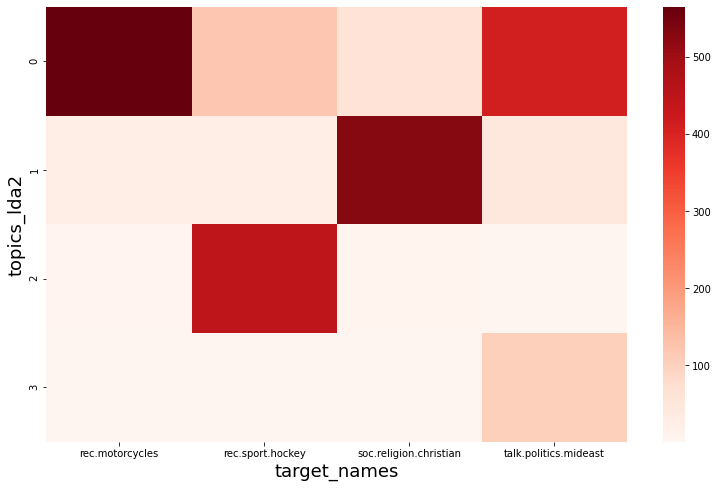

In [60]:
clusters = data_filtered.groupby(['topics_lda2', 'target_names']).size()
fig, ax1 = plt.subplots(figsize = (13,8))
heatmap(clusters.unstack(level = 'target_names'), ax = ax1, cmap = 'Reds')
ax1.set_xlabel('target_names').set_size(18)
ax1.set_ylabel('topics_lda2').set_size(18)

C:\Anaconda\envs\uni\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


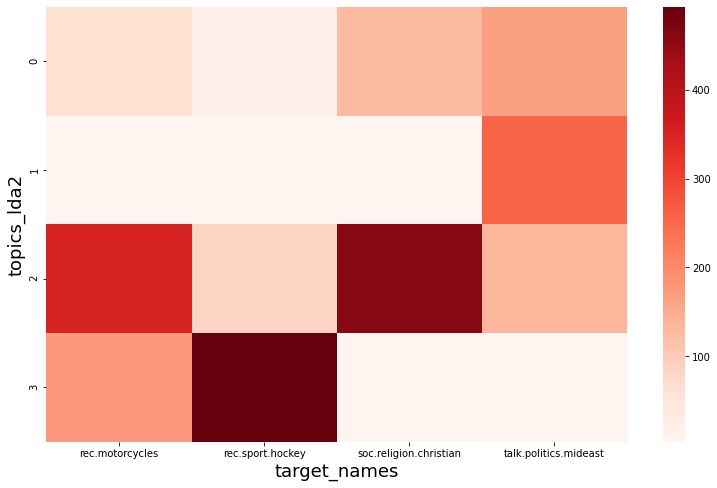

In [36]:
clusters = data_filtered.groupby(['topics_lda2', 'target_names']).size()
fig, ax1 = plt.subplots(figsize = (13,8))
heatmap(clusters.unstack(level = 'target_names'), ax = ax1, cmap = 'Reds')
ax1.set_xlabel('target_names').set_size(18)
ax1.set_ylabel('topics_lda2').set_size(18)

In [37]:
data_filtered[['target','target_names']].value_counts()

C:\Anaconda\envs\uni\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


target  target_names          
10      rec.sport.hockey          600
15      soc.religion.christian    599
8       rec.motorcycles           598
17      talk.politics.mideast     564
dtype: int64

In [38]:
data_filtered['pred_lda'] = 0
for index, row in data_filtered.iterrows():
    if row.topics_lda2 == 0:
        data_filtered.loc[index,'pred_lda'] = 17
    if row.topics_lda2 == 1:
        data_filtered.loc[index,'pred_lda'] = 10
    if row.topics_lda2 == 2:
        data_filtered.loc[index,'pred_lda'] = 8
    if row.topics_lda2 == 3:
        data_filtered.loc[index,'pred_lda'] = 16

C:\Anaconda\envs\uni\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Anaconda\envs\uni\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Anaconda\envs\uni\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [39]:
print(classification_report(data_filtered.pred_lda, data_filtered.target))

              precision    recall  f1-score   support

           8       0.59      0.34      0.43      1029
          10       0.01      0.02      0.01       273
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00       680
          17       0.30      0.44      0.36       379

    accuracy                           0.22      2361
   macro avg       0.18      0.16      0.16      2361
weighted avg       0.30      0.22      0.25      2361

C:\Anaconda\envs\uni\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Anaconda\envs\uni\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set t